# BANK-MARKETING PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
bk_df=pd.read_csv("C:/Users/yuvak/OneDrive/Desktop/bank-marketing.csv")

In [3]:
bk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [4]:
bk_df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Basic data observation

In [5]:
#shape of the data
bk_df.shape

(45211, 19)

In [6]:
bk_df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:>

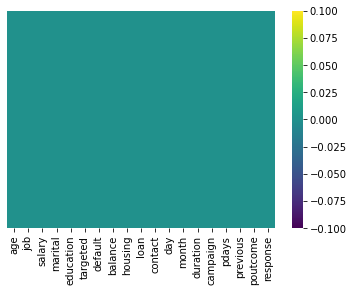

In [8]:
sns.heatmap(bk_df.isnull(),yticklabels=False,cbar=True,cmap='viridis',color="green")

Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [9]:
bk_df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [10]:
print("Mean:",bk_df['pdays'].mean())
print("Median:",bk_df['pdays'].median())
print("mode:",bk_df['pdays'].mode()[0])

Mean: 40.19782796222158
Median: -1.0
mode: -1


Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [12]:
print("Mean of pdays column after eliminating -1 values is", bk_df[bk_df['pdays'] != -1]['pdays'].mean())
print("Median of pdays column after eliminating -1 values is", bk_df[bk_df['pdays'] != -1]['pdays'].median())

Mean of pdays column after eliminating -1 values is 224.57769165556496
Median of pdays column after eliminating -1 values is 194.0


First, perform bi-variate analysis to identify the features that are directly associated with the target variable.

.Convert the response variable to a convenient form
.Make suitable plots for associations with numerical features and categorical features’

In [13]:
def impute_response(x):
    if x=='yes':
        return 1
    if x=='no':
        return 0

bk_df['response']=bk_df['response'].apply(impute_response)
bk_df['response'].value_counts()

0    39922
1     5289
Name: response, dtype: int64

In [14]:
# here we are seperating categorical and numerical data types 
cat_col = []
num_col = []
for col in bk_df.columns:
    if bk_df[col].dtype=='O':
        cat_col.append(col)
    else:
        num_col.append(col)
        
print("Categorical features : ",cat_col)
print("Numerical features : ",num_col)

Categorical features :  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features :  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


Categorical features

In [15]:
for col in cat_col[1:]:
    print(bk_df[col].value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
yes    37091
no      8120
Name: targeted, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


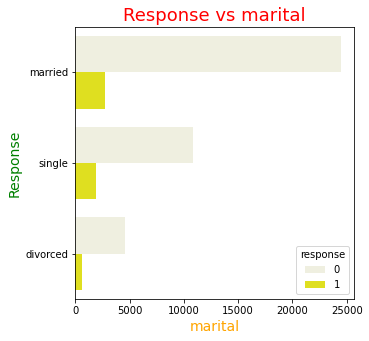

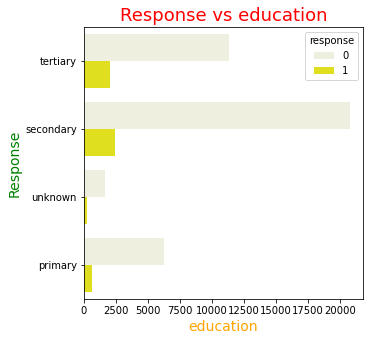

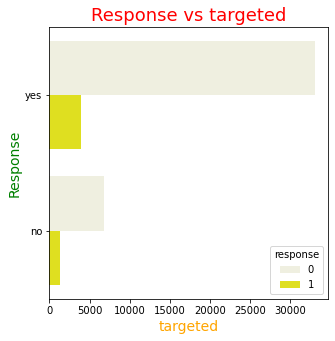

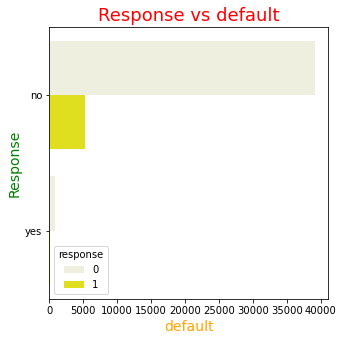

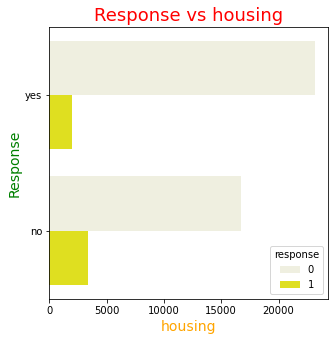

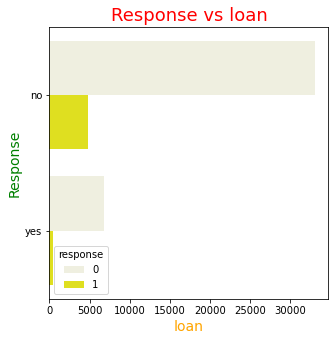

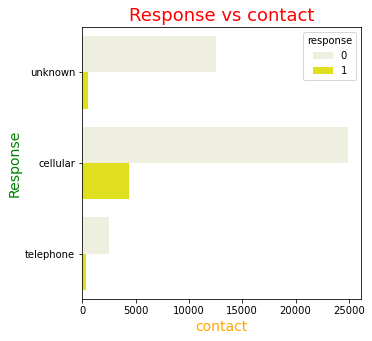

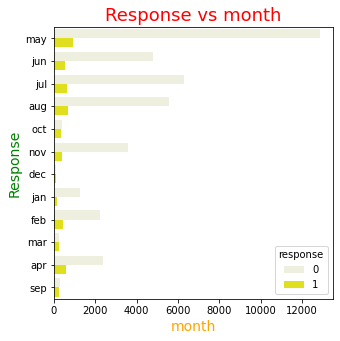

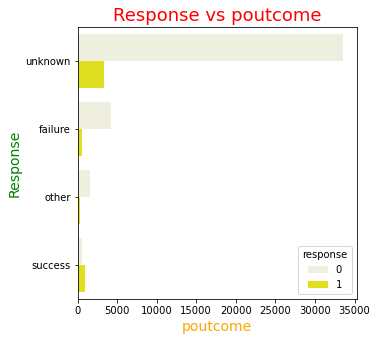

In [32]:
for col in cat_col[1:]:
    plt.figure(figsize=(5,5))
    sns.countplot(y=bk_df[col],hue=bk_df["response"],color="yellow")
    plt.title("Response vs "+col,fontsize=18,color="Red")
    plt.xlabel(col,fontsize=14,color="orange")
    plt.ylabel("Response",fontsize=14,color="green")
    plt.show()

'poutcome' column is not assosciated with target column because it has more missing values.

In [33]:
bk_df.drop('poutcome',axis=1,inplace=True)

- Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:xlabel='education'>

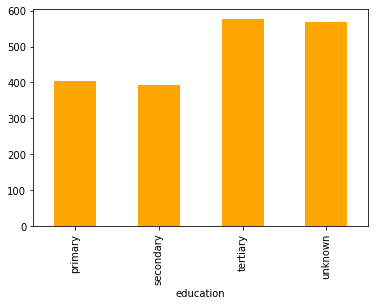

In [34]:
bk_df.groupby('education')['balance'].median().plot.bar(color='orange')

Numerical Features

In [35]:
for col in num_col[1:]:
    print(col,bk_df[col].nunique())

salary 11
balance 7168
day 31
duration 1573
campaign 48
pdays 559
previous 41
response 2


Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

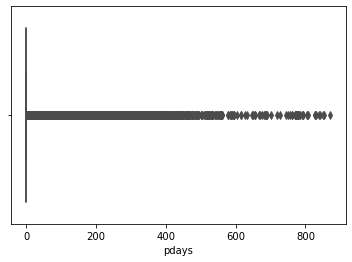

In [36]:
sns.boxplot(bk_df['pdays'],color="blue")

No.of outliers are observed in pdays coloumn

In [37]:
bk_df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
response,0.025155,0.020012,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<AxesSubplot:>

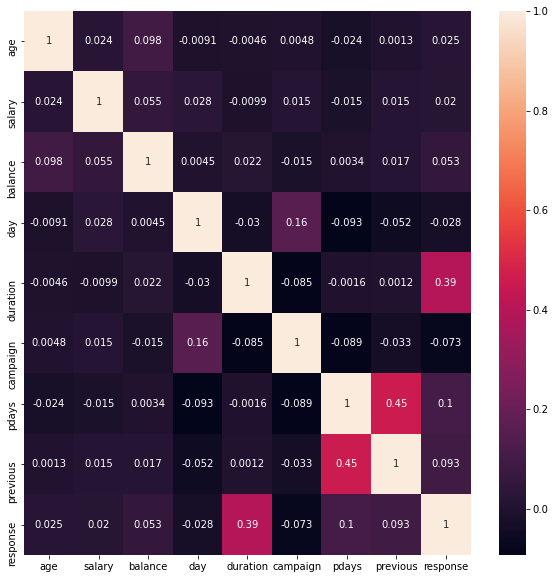

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(bk_df.corr(),annot=True)

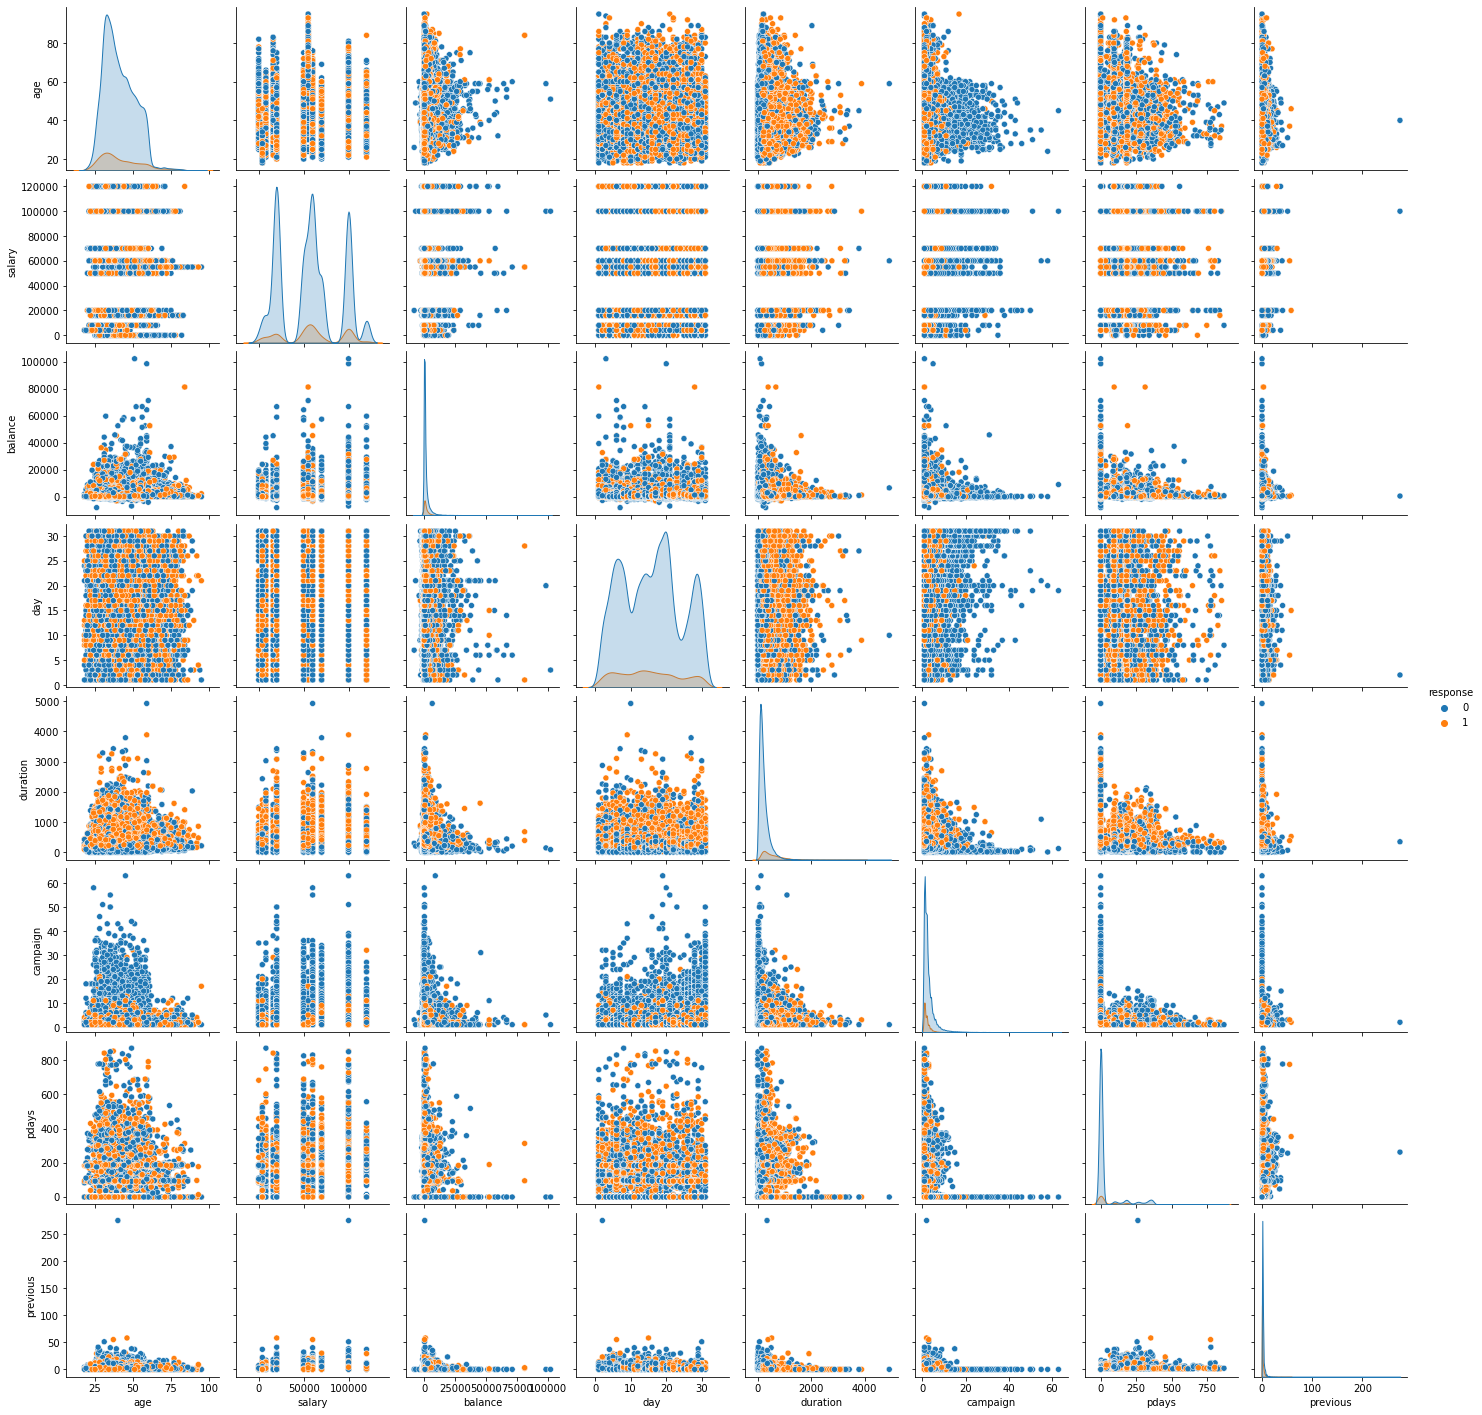

In [41]:
sns.pairplot(bk_df,hue='response')

In [42]:
bk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  response   45211 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 6.2+ MB


<Figure size 72x144 with 0 Axes>

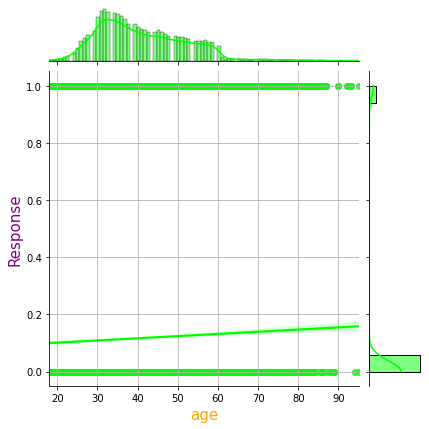

<Figure size 72x144 with 0 Axes>

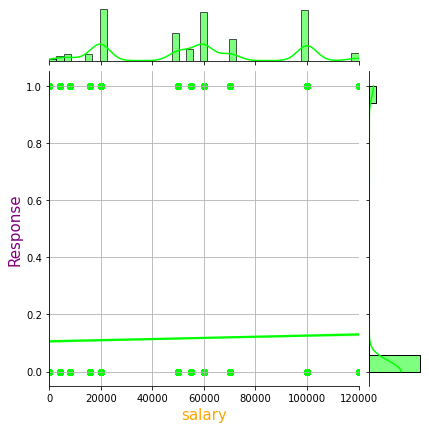

<Figure size 72x144 with 0 Axes>

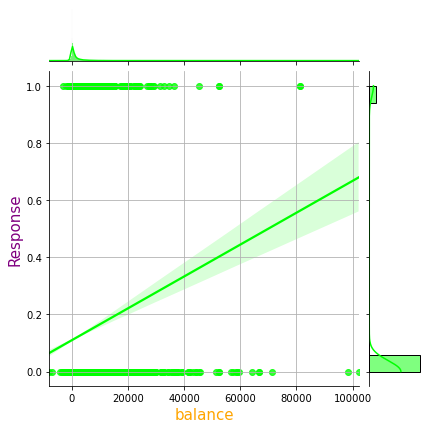

<Figure size 72x144 with 0 Axes>

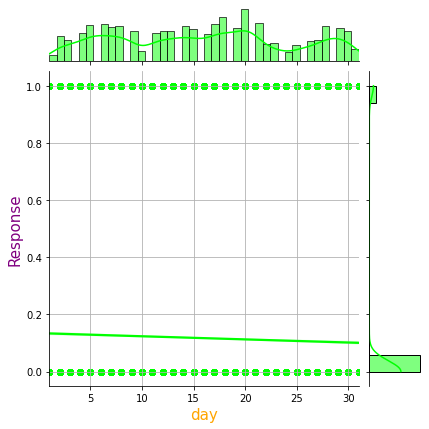

<Figure size 72x144 with 0 Axes>

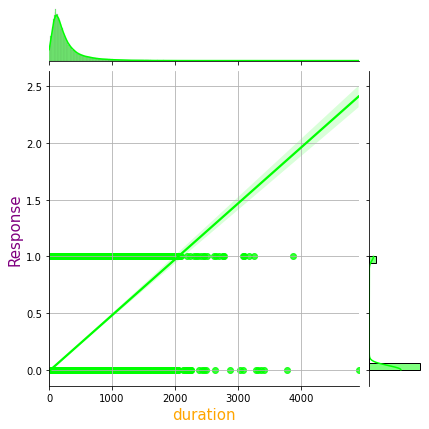

<Figure size 72x144 with 0 Axes>

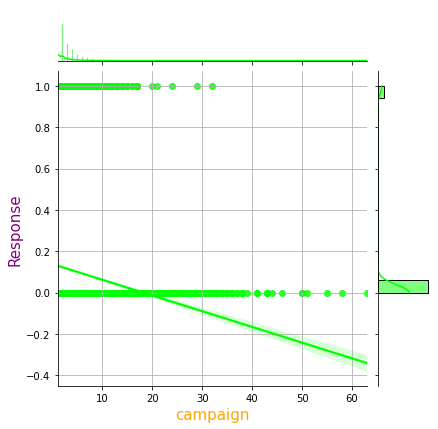

<Figure size 72x144 with 0 Axes>

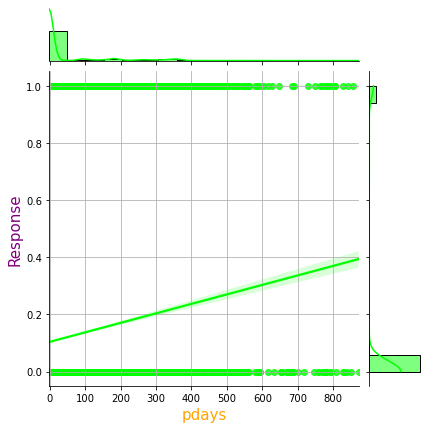

<Figure size 72x144 with 0 Axes>

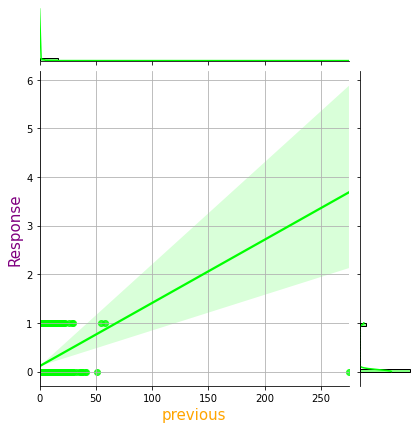

In [45]:
for col in num_col[:-1]:
    plt.figure(figsize=(1,2))
    sns.jointplot(x = bk_df[col],y = bk_df["response"],kind='reg',color="lime")
    plt.xlabel(col,fontsize = 15,color="orange")
    plt.ylabel("Response",fontsize = 15,color="purple")
    plt.grid()
    plt.show()

-Are the features about the previous campaign data useful?

In [46]:
bk_df[['previous','response']].groupby("response").mean()

,previous
response,
0,0.502154
1,1.170354


In [47]:
bk_df[['campaign','response']].groupby("response").mean()

,campaign
response,
0,2.846350
1,2.141047


<AxesSubplot:xlabel='pdays', ylabel='Density'>

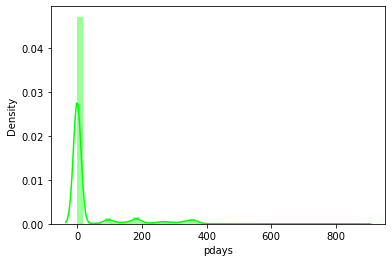

In [48]:
sns.distplot(bk_df['pdays'],color="lime")

-how do you handle the pdays column with a value of -1 where the previous campaign data is missing?

In [49]:
bk_df['pdays_no_contact'] = np.where(bk_df['pdays']==-1,1,0)
bk_df['pdays_no_contact'].value_counts()

1    36954
0     8257
Name: pdays_no_contact, dtype: int64

In [50]:
bk_df[['targeted','response']].groupby("targeted").mean()

,response
targeted,
no,0.164409
yes,0.106603


In [51]:
bk_df[['housing','response']].groupby("housing").mean()

,response
housing,
no,0.167024
yes,0.077000


In [52]:
bk_df[['default','response']].groupby("default").mean()

,response
default,
no,0.117961
yes,0.063804


In [53]:
bk_df[['loan','response']].groupby("loan").mean()

,response
loan,
no,0.126557
yes,0.066814


In [54]:
bk_df[['marital','response']].groupby("marital").mean()

,response
marital,
divorced,0.119455
married,0.101235
single,0.149492


In [55]:
bk_df[['education','response']].groupby("education").mean()

,response
education,
primary,0.086265
secondary,0.105594
tertiary,0.150064
unknown,0.135703


In [56]:
bk_df[['job','response']].groupby("job").mean()

,response
job,
admin.,0.122027
blue-collar,0.072750
entrepreneur,0.082717
housemaid,0.087903
management,0.137556
retired,0.227915
self-employed,0.118429
services,0.088830
student,0.286780


In [57]:
bk_df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [58]:
dict={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
bk_df['month']=bk_df['month'].map(dict)

In [59]:
bk_df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [60]:
bk_df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [61]:
cat_col

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

# Data Preprocessing

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

cat_features = ['job','marital','education','targeted','default','housing','loan','contact','month']

X = pd.get_dummies( bk_df, columns=cat_features, drop_first=True)

In [64]:
sc= MinMaxScaler()
a = sc.fit_transform(bk_df[['salary']])
b = sc.fit_transform(bk_df[['balance']])
c = sc.fit_transform(bk_df[['day']])
d = sc.fit_transform(bk_df[['duration']])
e = sc.fit_transform(bk_df[['campaign']])
f = sc.fit_transform(bk_df[['pdays']])
g = sc.fit_transform(bk_df[['previous']])
h = sc.fit_transform(bk_df[['pdays_no_contact']])

In [65]:
X['salary'] = a
X['balance'] = b
X['day']=c
X['duration']=d
X['campaign']=e
X['pdays'] = f
X['previous'] = g
X['pdays_no_contact']=h

In [66]:
X.shape

(45211, 43)

Resampling

Text(0.5, 1.0, 'Class Distribution Before Resampling')

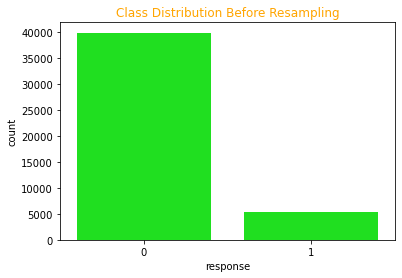

In [78]:
sns.countplot('response', data=bk_df,color="lime").set_title('Class Distribution Before Resampling',color="orange")

In [79]:
X_no = X[X.response == 0]
X_yes = X[X.response == 1]

In [80]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

39922


In [81]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
print(len(X_upsampled))

79844


Text(0.5, 1.0, 'Class Distribution Before Resampling')

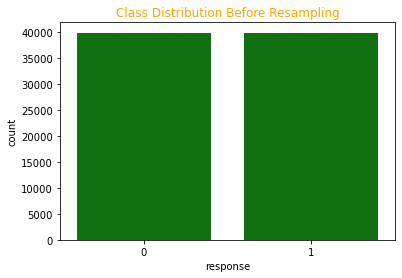

In [83]:
sns.countplot('response', data=X_upsampled,color="green").set_title('Class Distribution Before Resampling',color="orange")

# ML model

Train Test and split

Now it's time to do a train test split, and train our model!

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x = X_upsampled.drop(['response'], axis=1)  #features (independent variables)
y = X_upsampled['response']                #target (dependent variable)

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.25,random_state=70)

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train,Y_train)

LogisticRegression()

In [88]:
lr_pred=lr.predict(X_test)

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [93]:
Y_test[:20]

51853    1
27901    0
40500    1
38611    0
24872    0
19672    0
17011    0
77503    1
30667    0
64021    1
51223    1
61692    1
10909    0
65933    1
67435    1
72131    1
4244     0
14755    0
61867    1
5849     0
Name: response, dtype: int64

In [94]:
lr_pred[:20]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [95]:
confusion_matrix(Y_test,lr_pred)

array([[8258, 1686],
       [1822, 8195]], dtype=int64)

In [96]:
accuracy_score(Y_test,lr_pred)*100 

82.42573017383899

In [97]:
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      9944
           1       0.83      0.82      0.82     10017

    accuracy                           0.82     19961
   macro avg       0.82      0.82      0.82     19961
weighted avg       0.82      0.82      0.82     19961



Accuracy of model with logistic regression is 82%.

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, Y_train)

rf_pred = rfc.predict(X_test)

In [99]:
Y_test[:20]

51853    1
27901    0
40500    1
38611    0
24872    0
19672    0
17011    0
77503    1
30667    0
64021    1
51223    1
61692    1
10909    0
65933    1
67435    1
72131    1
4244     0
14755    0
61867    1
5849     0
Name: response, dtype: int64

In [100]:
rf_pred[:20]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [101]:
confusion_matrix(Y_test,rf_pred)

array([[ 9286,   658],
       [   10, 10007]], dtype=int64)

In [102]:
accuracy_score(Y_test,rf_pred)*100 

96.65347427483593

In [103]:
print(classification_report(Y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      9944
           1       0.94      1.00      0.97     10017

    accuracy                           0.97     19961
   macro avg       0.97      0.97      0.97     19961
weighted avg       0.97      0.97      0.97     19961



Accuracy of model with Random forest is 97%

By comparing the models we get the highest accurcay percentage of 97% rather than Logistic regression algorithm model.